# Algorithm: kiểm tra tính đơn điệu của 1 array

### BS. Lê Ngọc Khả Nhi


# Diễn đạt bài toán:

Trong một nghiên cứu, người ta theo dõi một đại lượng sinh lý/bệnh X trong thời gian kéo dài trên nhiều bệnh nhân. Mỗi bệnh nhân sẽ có 1 chuỗi dữ liệu dài/ngắn khác nhau gồm nhiều giá trị của X. Giả sử ta được yêu cầu viết 1 hàm để chọn lọc những bệnh nhân nào có giá trị X tăng hoặc giảm một cách đơn điệu.


# Phân tích

## Dữ liệu đầu vào

Dữ liệu đầu vào của function là 1 list hay 1D array, chứa giá trị là các con số (float hay integer), array này có độ dài > 0 và có thể chứa giá trị lặp lại liên tiếp.


## Kết quả đầu ra
Kết quả đầu ra là 1 giá trị boolean (True/False).


## Cấu trúc dữ liệu
Cấu trúc dữ liệu trong algorithm chính là array. 


## Hướng giải quyết
Đây không phải là bài toán tìm kiếm (searching), và việc xếp thứ tự list không giúp ích gì cả; nhưng ta bắt buộc phải giữ nguyên thứ tự nguyên thủy và kiểm tra lần lượt từng vị trí trong array và so sánh với vị trí trước hoặc sau nó để kiểm tra điều kiện. Ta có thể dùng 1 vòng lặp for hoặc 1 vòng lặp while, cùng if condition check

Nhận xét: 

Theo định nghĩa, biến thiên đơn điệu là "không tăng" hoặc "không giảm", do đó mục tiêu cần kiểm tra là mệnh đề phủ định của "tăng"/"giảm".

Tính chất "không tăng", "không giảm" có thể áp dụng được cho 2 giá trị bằng nhau liên tiếp. 


## Hiệu suất
Do không thể bỏ qua 1 phần tử nào cả, hiệu suất tốt nhất ta có thể đạt được về thời gian là O(N) với N là kích thước array. Hiệu suất về không gian lưu trữ sẽ là O(1).

# Đáp án 1

In [1]:
# Giải pháp dùng vòng lặp for và 2 conditions check

def monotonic_check(lst):
    
    assert(len(lst) > 1), 'Array phải chứa ít nhất 2 giá trị'
    
    # giá trị cơ bản của 2 đkiện
    no_decrease = True
    no_increase = True
    
    # vòng lặp
    for i in range(1, len(lst)):
        if lst[i] < lst[i-1]:
            no_decrease = False
        if lst[i] > lst[i-1]:
            no_increase = False
    
    # tổng hợp
    return no_decrease or no_increase

In [2]:
monotonic_check([])

AssertionError: Array phải chứa ít nhất 2 giá trị

In [4]:
monotonic_check([0])

AssertionError: Array phải chứa ít nhất 2 giá trị

In [5]:
monotonic_check([1,1])

True

In [6]:
monotonic_check([1,1,2])

True

In [8]:
monotonic_check([1.5, 0.2, 0.01, -0.8, -1.6])

True

In [7]:
monotonic_check([1,1,2,0])

False

In [10]:
monotonic_check([3,1,1.5,0.5,0])

False

# Đáp án 2

In [13]:
# Giải pháp dùng vòng lặp while và 2 conditions check

def monotonic_check_2(lst):
    
    assert(len(lst) > 1), 'Array phải chứa ít nhất 2 giá trị'
    
    no_decrease = True
    no_increase = True
    i=1
    while i < len(lst):
        if lst[i] < lst[i-1]:
            no_decrease = False
        if lst[i] > lst[i-1]:
            no_increase = False
        i += 1
    
    return no_decrease or no_increase

In [16]:
monotonic_check_2([1.5, 0.2, 0.01, 0.0, 0, -0.8, -1.6])

True

In [18]:
monotonic_check_2([0.03, 0.178, 0.69, 0.982, 1.274, 1.638, 1.943])

True

In [20]:
monotonic_check_2([0.03, 0.178, 0.69, 0.5, 0.982, 1.274, 1.638, 1.943])

False

# Đáp án 3

Giải pháp này không dùng condition check (if) mà dùng phép nhân giữa 2 giá trị boolean, ta tiết kiệm được 2 dòng code

In [34]:
def monotonic_check_3(lst):
    
    assert(len(lst) > 1), 'Array phải chứa ít nhất 2 giá trị'
    
    no_decrease = True
    no_increase = True
    for i in range(1, len(lst)):
        no_decrease *= (lst[i] <= lst[i-1])
        no_increase *= (lst[i] >= lst[i-1])
        
    return no_decrease==1 or no_increase==1

In [35]:
monotonic_check_3([1.5, 0.2, 0.01, 0.0, 0, -0.8, -1.6])

True

In [36]:
monotonic_check_3([0.03, 0.178, 0.69, 0.982, 1.274, 1.638, 1.943])

True

In [39]:
monotonic_check_3([1,1,1])

True

In [37]:
monotonic_check_3([0.03, 0.178, 0.69, 0.5, 0.982, 1.274, 1.638, 1.943])

False

# Kiểm tra hàng loạt nhiều chuỗi

Ta tạo ra 1 chuỗi tín hiệu amplitude có khuynh hướng biến đổi như sau:

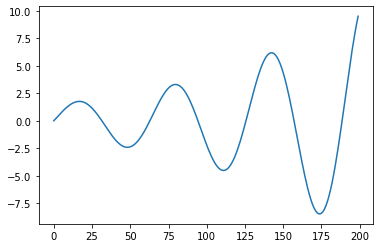

In [40]:
import numpy as np
import matplotlib.pyplot as plt

time = np.arange(0, 20, 0.1)
amplitude = np.sin(time) * 1.5*np.exp(0.1 * time)

plt.plot(amplitude)

Cắt chuỗi này thành 10 đoạn bằng nhàu với độ dài 20, áp dụng các hàm monotonic check ở trên để kiểm tra tính đơn điệu:

In [42]:
samples = np.array(amplitude).reshape(10,20)

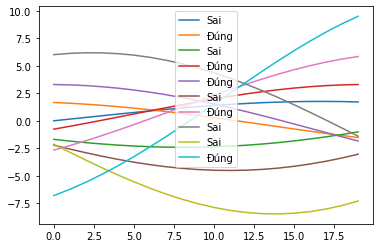

In [43]:
# Kiểm tra đáp án 1

for i in range(10):
    samp = samples[i,:]
    mono = monotonic_check(samp)
    plt.plot(samples[i,:], label = 'Đúng' if mono else 'Sai')

plt.legend()

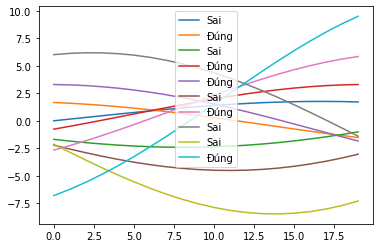

In [44]:
# Kiểm tra đáp án 2

for i in range(10):
    samp = samples[i,:]
    mono = monotonic_check_2(samp)
    plt.plot(samples[i,:], label = 'Đúng' if mono else 'Sai')

plt.legend()

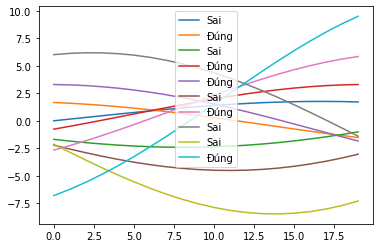

In [45]:
# Kiểm tra đáp án 3

for i in range(10):
    samp = samples[i,:]
    mono = monotonic_check_3(samp)
    plt.plot(samples[i,:], label = 'Đúng' if mono else 'Sai')

plt.legend()